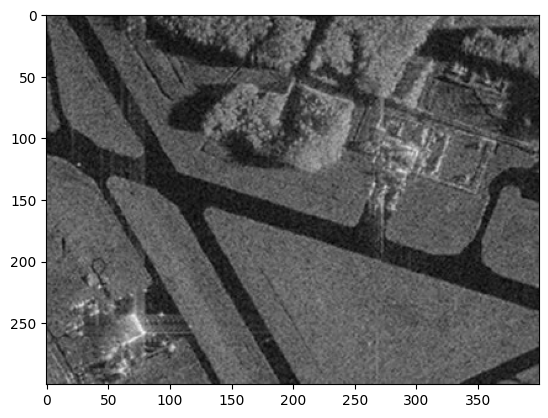

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image_gray, cmap="gray")

99
261
423
584
747
909
1071
1233
1313
1093
1137
1114
1085
1050
985
998
1086
1201
1152
1183
1279
1248
1372
1443
1541
1491
1534
1616
1684
1859
1743
1766
1733
1623
1451
1424
1431
1468
1477
1830
1554
1649
1686
1716
1693
1673
1603
2150
1706
1755
1740
1800
2607
1947
2029
2043
2113
2121
2090
2131
2383
1075
551
421
1435
324
294
240
238
209
156
120
106
83
10
0


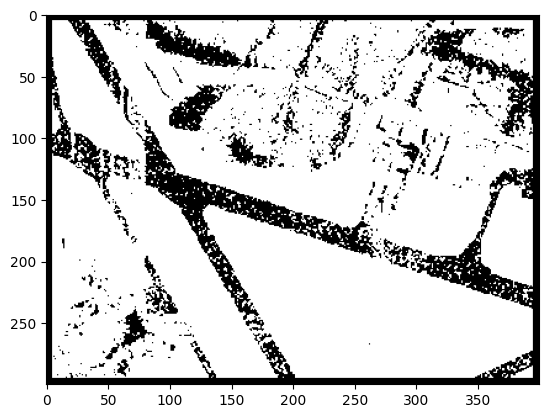

In [2]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255

seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average,5, 40)

plt.imshow(mask, cmap="gray")

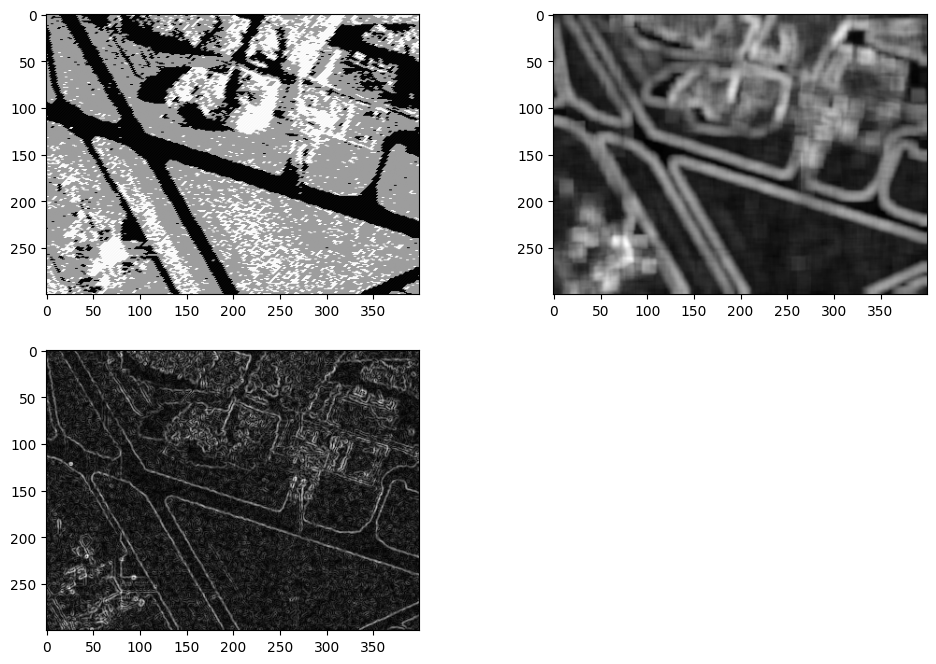

In [4]:
#2
#a)
flags = cv2.KMEANS_RANDOM_CENTERS


z = image_gray.reshape((-1,3))
# convert to np.float32
z = np.float32(z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(res2, cmap="gray")

#b)
local_std = ndimage.generic_filter(image_gray.astype(np.float64), np.std, size=15)
    
mean_local_std = np.mean(local_std)
homogeneity = 1.0 / (1.0 + mean_local_std/255.0)
plt.subplot(2, 2, 2)
plt.imshow(local_std, cmap="gray")

#c)
image_norm = image_gray.astype(np.float64) / 255.0
       
grad_x = ndimage.sobel(image_norm, axis=0)
grad_y = ndimage.sobel(image_norm, axis=1)
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
hist, _ = np.histogram(gradient_magnitude.flatten(), bins=256, range=(0, 1))
hist = hist[hist > 0] 
prob = hist / hist.sum()
entropy = -np.sum(prob * np.log2(prob))
    
homogeneity = 1.0 / (1.0 + entropy)
plt.subplot(2, 2, 3)
plt.imshow(gradient_magnitude, cmap="gray")

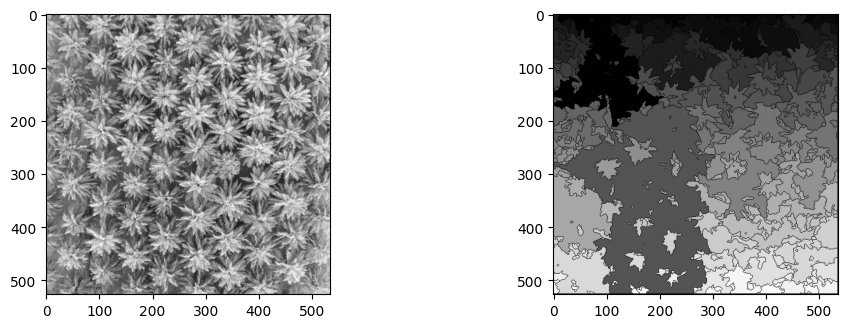

In [5]:
image = cv2.imread('palm_1.jpg')
image_gray_2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_gray_2, cmap="gray")

ret, thresh = cv2.threshold(image_gray_2,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg) 
markers = cv2.watershed(image, markers)

plt.subplot(2, 2, 2)
plt.imshow(markers, cmap="gray")